Курсоова

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, LabelEncoder

from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/laptop_price.csv"
df = pd.read_csv(filename, encoding='windows-1251')

df.head()

Mounted at /content/drive


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Позбудемось одиниць вимірювання для Ram та Weight та переведемо їх в числовий тип даних

In [3]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


У колонці ScreenResolution міститься інформація про те, чи є у ноутбука Touchscreen, тому виділимо її окрему колонку. Аналогічні дії зробимо для визначення чии має той чи інший ноутбук тип екрану IPS

In [4]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [5]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


Розрахуємо кількість пікселів на дюйм,  що є більш важливими даними ніж розширення екрану, враховуюси те, що у нам відома діагональ екранів

In [6]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df['Ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.drop(columns=['ScreenResolution', 'X_res','Y_res'],inplace=True)


df['Ppi']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: Ppi, Length: 1303, dtype: float64

Далі систематизуємо назви для процесорів

In [7]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [8]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [9]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df['Cpu brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu brand, Length: 1303, dtype: object

У колонці Memory представлена інформація про всі наявні типи пам'яті для ноутбука. Розіб'ємо цю колонку на відповідні типи пам'яті

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Ppi,Cpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [11]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].str.replace('SSD', '')
df["first"] = df["first"].str.replace('HDD', '')
df["first"] = df["first"].str.replace('Flash Storage', '')
df["first"] = df["first"].str.replace('Hybrid', '')

df["second"] = df["second"].str.replace('HDD', '')
df["second"] = df["second"].str.replace('SSD', '')
df["second"] = df["second"].str.replace('Hybrid', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df.drop(columns=['Memory'],inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


Залишимо тільки компанію графічного процесора, для кращої систематизації

In [12]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [13]:
df = df[df['Gpu brand'] != 'ARM']

In [14]:
df.drop(columns=['Gpu','Hybrid','Flash_Storage', 'laptop_ID'],inplace=True)

Приведемо назви операційних систем до одного вигляду

In [15]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    elif inp == 'Linux':
        return 'Linux'
    elif inp == 'No OS':
        return 'No OS'
    else:
        return 'Others'

df['Os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'],inplace=True)
df['Os']

0           Mac
1           Mac
2         No OS
3           Mac
4           Mac
         ...   
1298    Windows
1299    Windows
1300    Windows
1301    Windows
1302    Windows
Name: Os, Length: 1302, dtype: object

<h1>Перевірка даних<h1>

In [16]:
df.describe()

,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,Ppi,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000
mean,15.019278,8.385561,2.039416,1124.043894,0.146697,0.27957,146.568497,414.101382,183.874040
std,1.424861,5.085166,0.665274,699.158856,0.353940,0.44896,43.069016,515.889348,186.969314
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.00000,90.583402,0.000000,0.000000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.00000,127.335675,0.000000,0.000000
50%,15.600000,8.000000,2.040000,978.000000,0.000000,0.00000,141.211998,0.000000,256.000000
75%,15.600000,8.000000,2.300000,1488.435000,0.000000,1.00000,157.350512,1000.000000,256.000000
max,18.400000,64.000000,4.700000,6099.000000,1.000000,1.00000,352.465147,2000.000000,1024.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   Product      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Inches       1302 non-null   float64
 4   Ram          1302 non-null   int32  
 5   Weight       1302 non-null   float32
 6   Price_euros  1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   Ips          1302 non-null   int64  
 9   Ppi          1302 non-null   float64
 10  Cpu brand    1302 non-null   object 
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  Gpu brand    1302 non-null   object 
 14  Os           1302 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(4), object(6)
memory usage: 152.6+ KB


Перевіряємо на пропущенні значення

In [18]:
df.isnull().sum()

Company        0
Product        0
TypeName       0
Inches         0
Ram            0
Weight         0
Price_euros    0
Touchscreen    0
Ips            0
Ppi            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
Os             0
dtype: int64

Видаляємо дублікати

In [19]:
df.duplicated().sum()

28

In [20]:
df.drop_duplicates(inplace=True)

<h1>Візуальний аналіз<h1>

<ipython-input-21-f0e373cef3f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TypeName",ax=axes[0],palette='spring',data=df,order=df["TypeName"].value_counts().index)
<ipython-input-21-f0e373cef3f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='Price_euros',y ="TypeName" ,ax=axes[1], palette='spring', data = df)


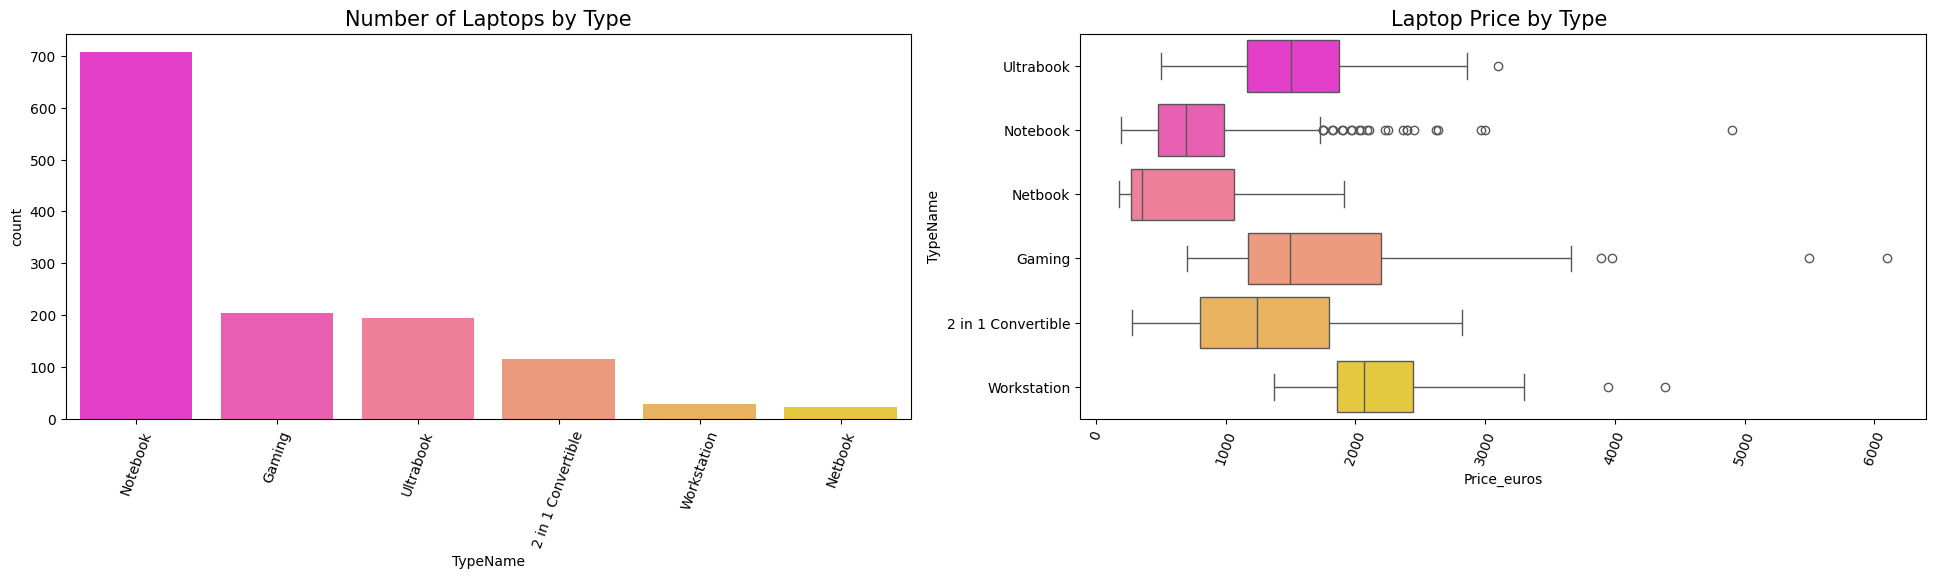

In [21]:
fig, axes = plt.subplots(1,2, figsize=(24, 5))

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="TypeName",ax=axes[0],palette='spring',data=df,order=df["TypeName"].value_counts().index)
sns.boxplot(x ='Price_euros',y ="TypeName" ,ax=axes[1], palette='spring', data = df)

axes[0].set_title("Number of Laptops by Type",fontsize=15)
axes[1].set_title("Laptop Price by Type ",fontsize=15)
plt.show()

<ipython-input-22-4f8a3f01b55e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Company",ax=axes[0],palette='spring',data=df,order=df["Company"].value_counts().index)
<ipython-input-22-4f8a3f01b55e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='Price_euros',y ="Company" ,palette='spring',data = df)


Text(0.5, 1.0, 'Laptop Price by Company')

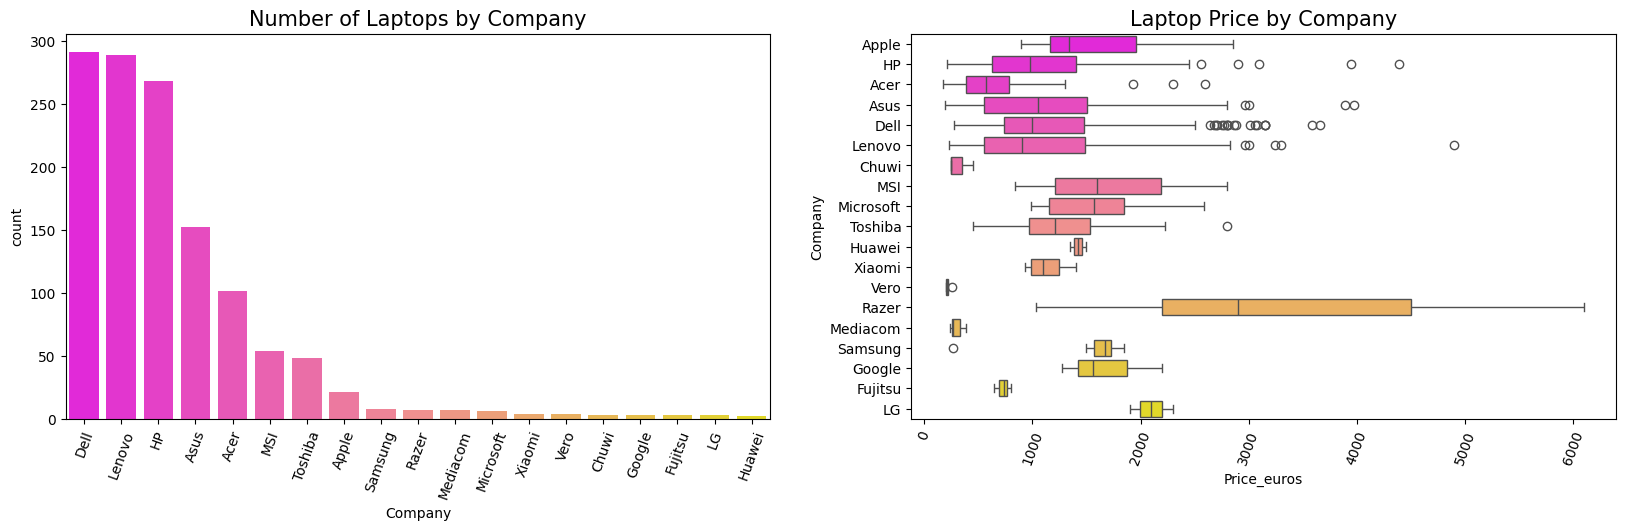

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="Company",ax=axes[0],palette='spring',data=df,order=df["Company"].value_counts().index)
sns.boxplot(x ='Price_euros',y ="Company" ,palette='spring',data = df)

axes[0].set_title("Number of Laptops by Company",fontsize=15)
axes[1].set_title("Laptop Price by Company",fontsize=15)

<ipython-input-23-c0745163d438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gpu brand",ax=axes[0],palette='spring',data=df,order=df["Gpu brand"].value_counts().index)
<ipython-input-23-c0745163d438>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='Gpu brand',y ="Price_euros" ,palette='spring',ax=axes[1],data = df)


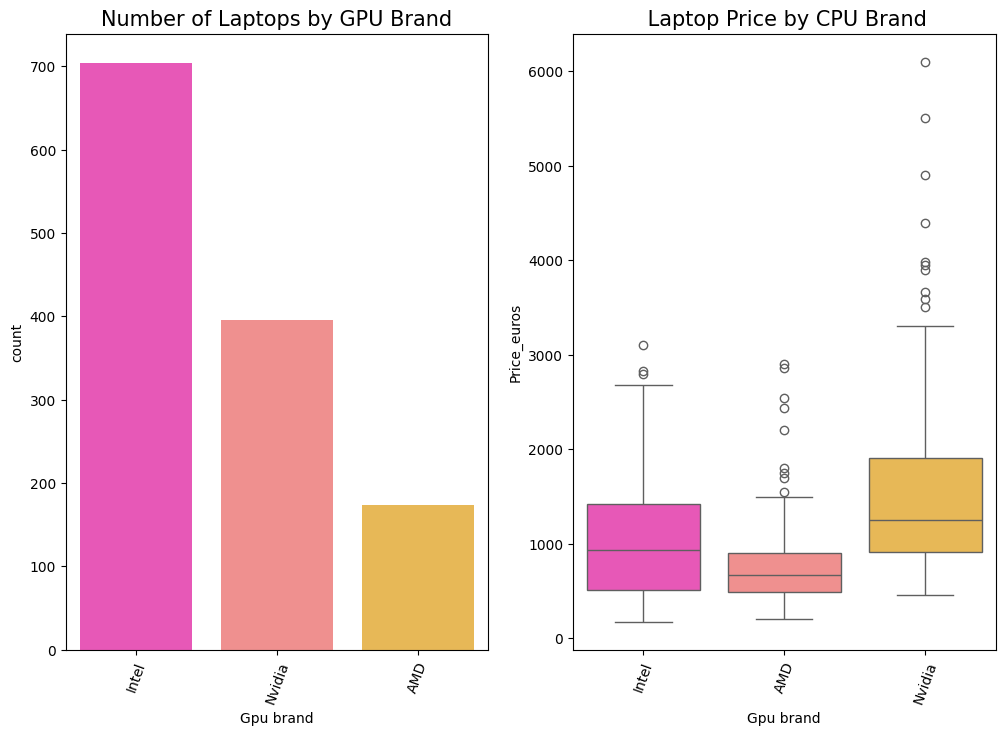

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12, 8))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="Gpu brand",ax=axes[0],palette='spring',data=df,order=df["Gpu brand"].value_counts().index)
sns.boxplot(x ='Gpu brand',y ="Price_euros" ,palette='spring',ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by GPU Brand",fontsize=15)
axes[1].set_title(" Laptop Price by CPU Brand",fontsize=15)

plt.show()

<ipython-input-24-834ffe55d3e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cpu brand",ax=axes[0],palette='spring',data=df,order=df["Cpu brand"].value_counts().index)
<ipython-input-24-834ffe55d3e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Cpu brand",y ="Price_euros" ,palette='spring',ax=axes[1],data = df)


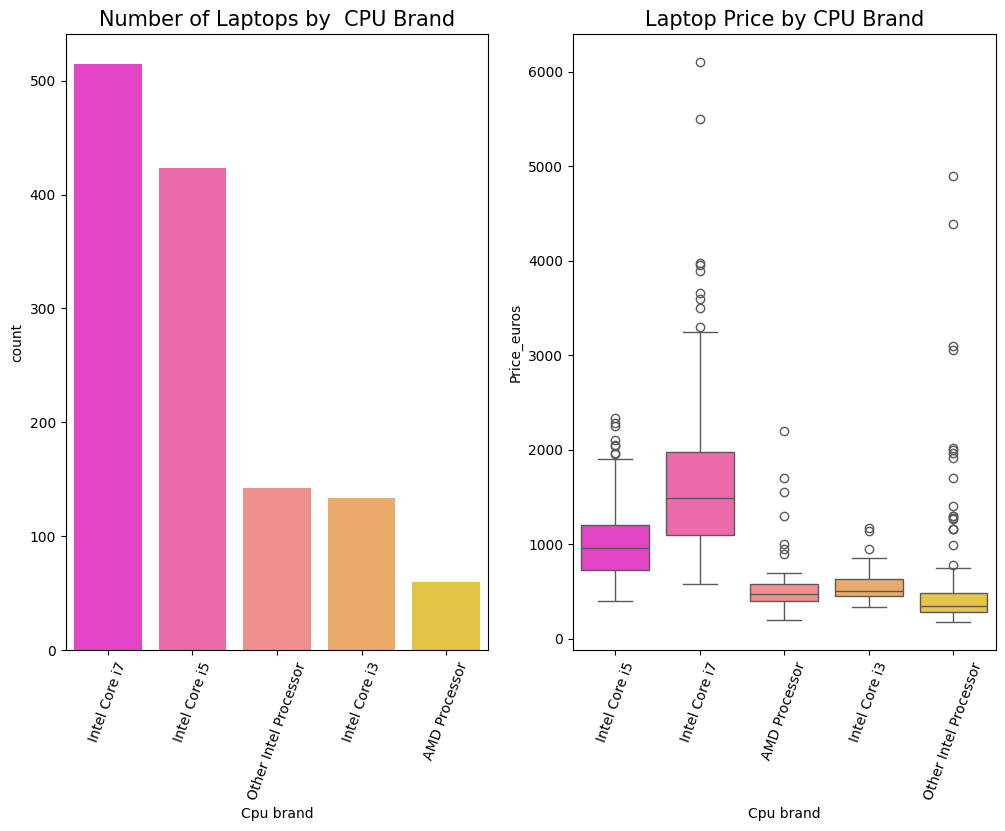

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12, 8))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="Cpu brand",ax=axes[0],palette='spring',data=df,order=df["Cpu brand"].value_counts().index)
sns.boxplot(x ="Cpu brand",y ="Price_euros" ,palette='spring',ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by  CPU Brand",fontsize=15)
axes[1].set_title("Laptop Price by CPU Brand",fontsize=15)


plt.show()

<ipython-input-25-a9539d09e2ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Os",ax=axes[0],palette='spring',data=df,order=df["Os"].value_counts().index)
<ipython-input-25-a9539d09e2ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Os",y ='Price_euros' ,palette='spring',ax=axes[1],data = df)


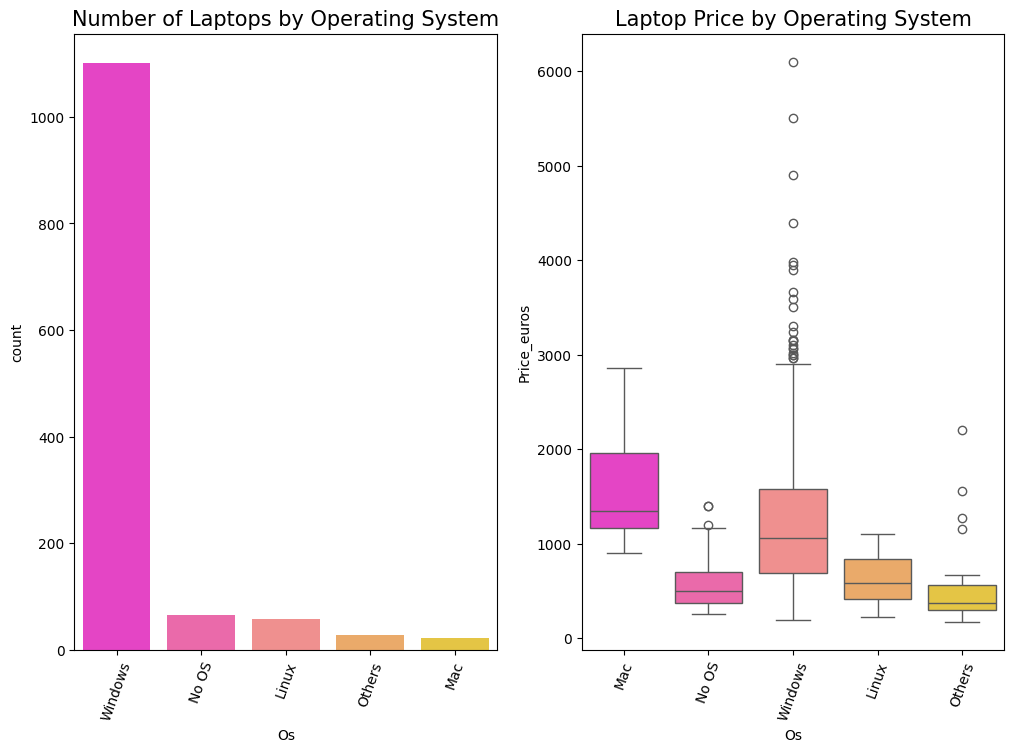

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12, 8))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
sns.countplot(x="Os",ax=axes[0],palette='spring',data=df,order=df["Os"].value_counts().index)
sns.boxplot(x ="Os",y ='Price_euros' ,palette='spring',ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by Operating System",fontsize=15)
axes[1].set_title("Laptop Price by Operating System",fontsize=15)
plt.show()

<ipython-input-26-c5dea4b7ad80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ram",ax=axes[0],palette='spring',order=df["Ram"].value_counts().index,data=df)
<ipython-input-26-c5dea4b7ad80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Ram",y ="Price_euros" ,palette='spring',data = df)


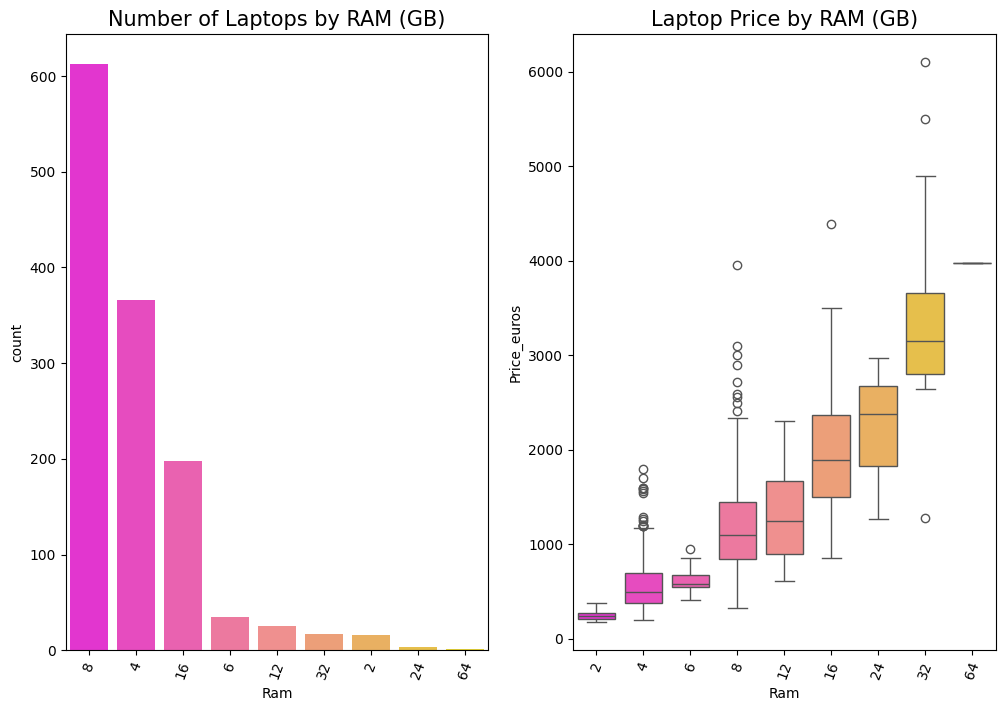

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="Ram",ax=axes[0],palette='spring',order=df["Ram"].value_counts().index,data=df)
sns.boxplot(x ="Ram",y ="Price_euros" ,palette='spring',data = df)

axes[0].set_title("Number of Laptops by RAM (GB)",fontsize=15)
axes[1].set_title("Laptop Price by RAM (GB)",fontsize=15)

plt.show()

In [27]:
numerical_df = df[['Ram', 'Inches', 'Weight', 'Price_euros', 'Touchscreen', 'Ips', 'Ppi', 'HDD', 'SSD']]
correlation_matrix_numerical = numerical_df.corr()
print(correlation_matrix_numerical)

                  Ram    Inches    Weight  Price_euros  Touchscreen       Ips  \
Ram          1.000000  0.240188  0.388846     0.740176     0.113559  0.203144   
Inches       0.240188  1.000000  0.826399     0.065697    -0.359689 -0.107980   
Weight       0.388846  0.826399  1.000000     0.211359    -0.292339  0.023846   
Price_euros  0.740176  0.065697  0.211359     1.000000     0.190636  0.251892   
Touchscreen  0.113559 -0.359689 -0.292339     0.190636     1.000000  0.137146   
Ips          0.203144 -0.107980  0.023846     0.251892     0.137146  1.000000   
Ppi          0.295445 -0.412734 -0.319547     0.471973     0.452221  0.289185   
HDD          0.097196  0.528263  0.510890    -0.098577    -0.205143 -0.090478   
SSD          0.599822 -0.104661 -0.057147     0.670088     0.252352  0.215568   

                  Ppi       HDD       SSD  
Ram          0.295445  0.097196  0.599822  
Inches      -0.412734  0.528263 -0.104661  
Weight      -0.319547  0.510890 -0.057147  
Price_euros  

Визначимо чи впливає на ціну тип ноутбуку

In [28]:
df_gptest = df[['TypeName','Price_euros']]
grouped_test2=df_gptest[['TypeName', 'Price_euros']].groupby(['TypeName'])

In [29]:
from scipy import stats
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Ultrabook')['Price_euros'], grouped_test2.get_group('Notebook')['Price_euros'], grouped_test2.get_group('Netbook')['Price_euros'], grouped_test2.get_group('Gaming')['Price_euros'], grouped_test2.get_group('2 in 1 Convertible')['Price_euros'], grouped_test2.get_group('Workstation')['Price_euros'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 155.90595334410884 , P = 3.243371666744509e-129


In [30]:
print("група 'Ultrabook'", stats.shapiro(grouped_test2.get_group('Ultrabook')['Price_euros']))
print("група 'Notebook'", stats.shapiro(grouped_test2.get_group('Notebook')['Price_euros']))
print("група 'Netbook'", stats.shapiro(grouped_test2.get_group('Netbook')['Price_euros']))
print("група 'Gaming'", stats.shapiro(grouped_test2.get_group('Gaming')['Price_euros']))
print("група '2 in 1 Convertible'", stats.shapiro(grouped_test2.get_group('2 in 1 Convertible')['Price_euros']))
print("група 'Workstation'", stats.shapiro(grouped_test2.get_group('Workstation')['Price_euros']))

група 'Ultrabook' ShapiroResult(statistic=0.9831055998802185, pvalue=0.01956580951809883)
група 'Notebook' ShapiroResult(statistic=0.840705394744873, pvalue=5.233807992956017e-26)
група 'Netbook' ShapiroResult(statistic=0.7425427436828613, pvalue=5.261397018330172e-05)
група 'Gaming' ShapiroResult(statistic=0.8571395874023438, pvalue=6.35895307764256e-13)
група '2 in 1 Convertible' ShapiroResult(statistic=0.9625328183174133, pvalue=0.0025242732372134924)
група 'Workstation' ShapiroResult(statistic=0.8799748420715332, pvalue=0.0033573973923921585)


P-value майже 0 або не перевищує рівня значущості 0.05, отже в усіх групах дані мають  розподіл що відрізняється від нормального. Тому для дисперсійного аналізу скористаємось непараметричним аналогом ANOVA - тестом Краскела-Уоліса.

In [31]:
result = stats.kruskal(grouped_test2.get_group('Ultrabook')['Price_euros'], grouped_test2.get_group('Notebook')['Price_euros'],
                       grouped_test2.get_group('Netbook')['Price_euros'], grouped_test2.get_group('Gaming')['Price_euros'],
                       grouped_test2.get_group('2 in 1 Convertible')['Price_euros'], grouped_test2.get_group('Workstation')['Price_euros'])

print(result)

KruskalResult(statistic=545.9793387702136, pvalue=9.441917882554493e-116)


Це чудовий результат із високим показником тесту, який показує сильну кореляцію, і P-value майже 0, що передбачає впевнену статистичну значущість.

In [32]:
!pip install category_encoders
from category_encoders import TargetEncoder

df2 = df.copy()
encoder = TargetEncoder()
features_object = ['Company', 'Product', 'TypeName', 'Gpu brand', 'Cpu brand', 'Os']

for col in features_object:
    df2[col] = encoder.fit_transform(df2[col], df2['Price_euros'])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [33]:
df2

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,1360.483088,1369.367509,1556.676019,13.3,8,1.37,1339.69,0,1,226.983005,1015.015248,0,128,1020.367713,1360.483088
1,1360.483088,1120.232308,1556.676019,13.3,8,1.34,898.94,0,0,127.677940,1015.015248,0,0,1020.367713,1360.483088
2,1080.314664,784.792911,788.744781,15.6,8,1.86,575.00,0,0,141.211998,1015.015248,0,256,1020.367713,593.420644
3,1360.483088,1369.367509,1556.676019,15.4,16,1.83,2537.45,0,1,220.534624,1612.277612,0,512,778.026625,1360.483088
4,1360.483088,1369.367509,1556.676019,13.3,8,1.37,1803.60,0,1,226.983005,1015.015248,0,256,1020.367713,1360.483088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1093.862215,1070.634166,1295.140901,14.0,4,1.80,638.00,1,1,157.350512,1612.277612,0,128,1020.367713,1202.132652
1271,1093.862215,1191.515088,1295.140901,13.3,16,1.30,1499.00,1,1,276.053530,1612.277612,0,512,1020.367713,1202.132652
1272,1093.862215,998.690949,788.744781,14.0,2,1.50,229.00,0,0,111.935204,565.843499,0,0,1020.367713,1202.132652
1273,1080.314664,1087.027834,788.744781,15.6,6,2.19,764.00,0,0,100.454670,1612.277612,1000,0,778.026625,1202.132652


In [34]:
correlation_matrix = df2.corr()

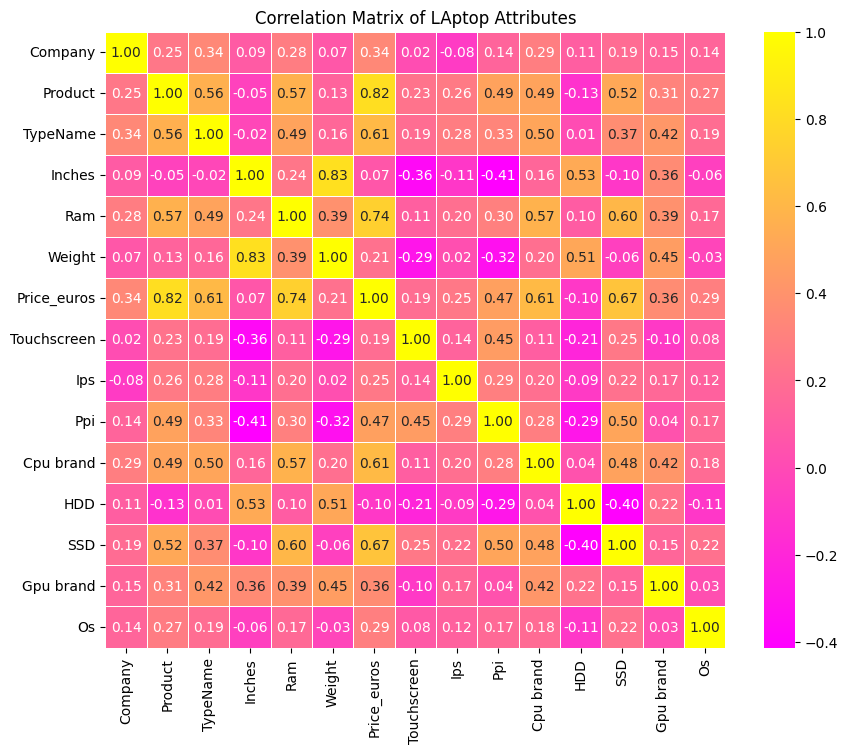

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='spring')
plt.title('Correlation Matrix of LAptop Attributes')
plt.show()

Поділ Даних

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [38]:
features_to_delete = ['Inches', 'HDD', 'Touchscreen']
df_model = df2.drop(columns=features_to_delete)

X = df_model.drop(['Price_euros'], axis=1)
y = df_model['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1019, 11)
X_test:  (255, 11)
y_train:  (1019,)
y_test:  (255,)


Множинна Лінійна регресія

In [39]:
lr1=LinearRegression()
lr1.fit(X_train[['SSD', 'Ram']], y_train)

LinearRegression()

In [40]:
lr1.score(X_test[['SSD', 'Ram']], y_test)

0.6213069884541926

In [41]:
lr1.score(X_train[['SSD', 'Ram']], y_train)

0.629068871757581

In [42]:
train_pred=lr1.predict(X_train[['SSD', 'Ram']])
train_pred[0:5]

array([ 721.88221179,  864.59249479, 1186.48873088, 1034.65953036,
        721.88221179])

In [43]:
pred=lr1.predict(X_test[['SSD', 'Ram']])
pred[0:5]

array([ 560.93409375,  560.93409375, 1186.48873088, 1186.48873088,
       1186.48873088])

In [44]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
results[0:5]

,Actual,Predicted
309,469.00,560.934094
622,776.00,560.934094
184,1199.00,1186.488731
705,795.00,1186.488731
522,1279.73,1186.488731


In [45]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in euros)')

    plt.show()
    plt.close()

<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

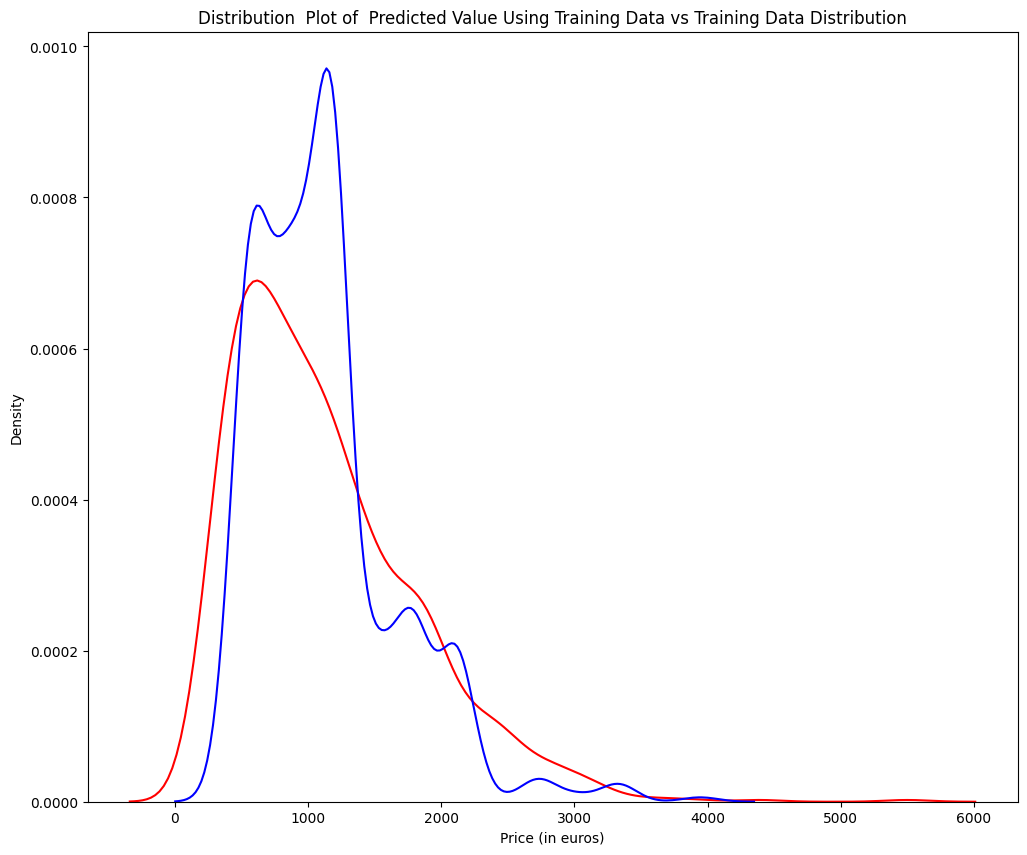

In [46]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, train_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

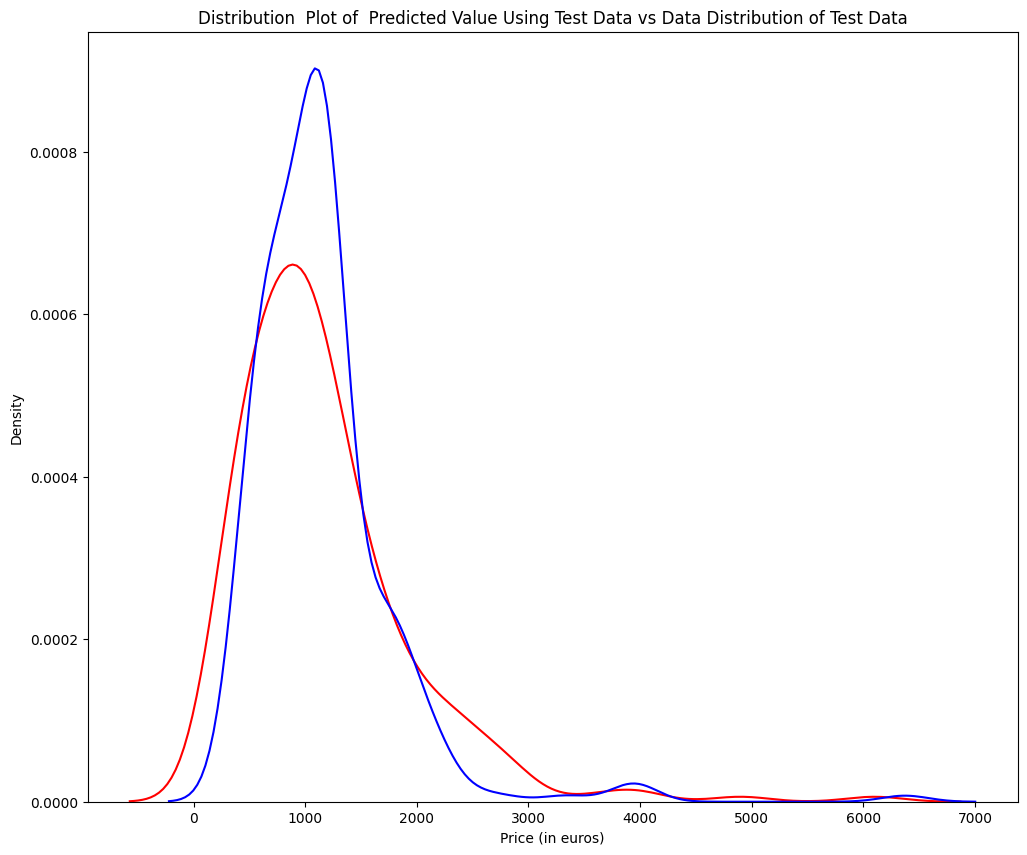

In [47]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [48]:
print("MSE :",mean_squared_error(y_test, pred))
print("MAE: ",mean_absolute_error(y_test, pred))

MSE : 228136.89328929197
MAE:  329.83738180497687


Гребенева регресія

In [49]:
from sklearn.model_selection import GridSearchCV
rr=Ridge()

In [50]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [51]:
rdg_grid_search = GridSearchCV(rr, parameters1, cv=5)

In [52]:
rdg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [53]:
rdg=rdg_grid_search.best_estimator_

In [54]:
rdg.fit(X_train, y_train)

Ridge(alpha=100)

In [55]:
print('Train accuracy = ', rdg.score(X_train, y_train))
print('Test accuracy = ', rdg.score(X_test, y_test))

Train accuracy =  0.8306459216819193
Test accuracy =  0.8137942600547221


In [56]:
rdg_train_pred = rdg.predict(X_train)
rdg_train_pred[0:5]

array([ 694.8040171 ,  250.15697359, 1282.40226716, 1067.7249455 ,
        862.42274157])

In [57]:
rdg_pred = rdg.predict(X_test)
rdg_pred[0:5]

array([  54.07359124,  639.00423993,  970.16978407, 1002.79099095,
       1105.94546112])

In [58]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': rdg_pred})
results[0:5]

,Actual,Predicted
309,469.00,54.073591
622,776.00,639.004240
184,1199.00,970.169784
705,795.00,1002.790991
522,1279.73,1105.945461


<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

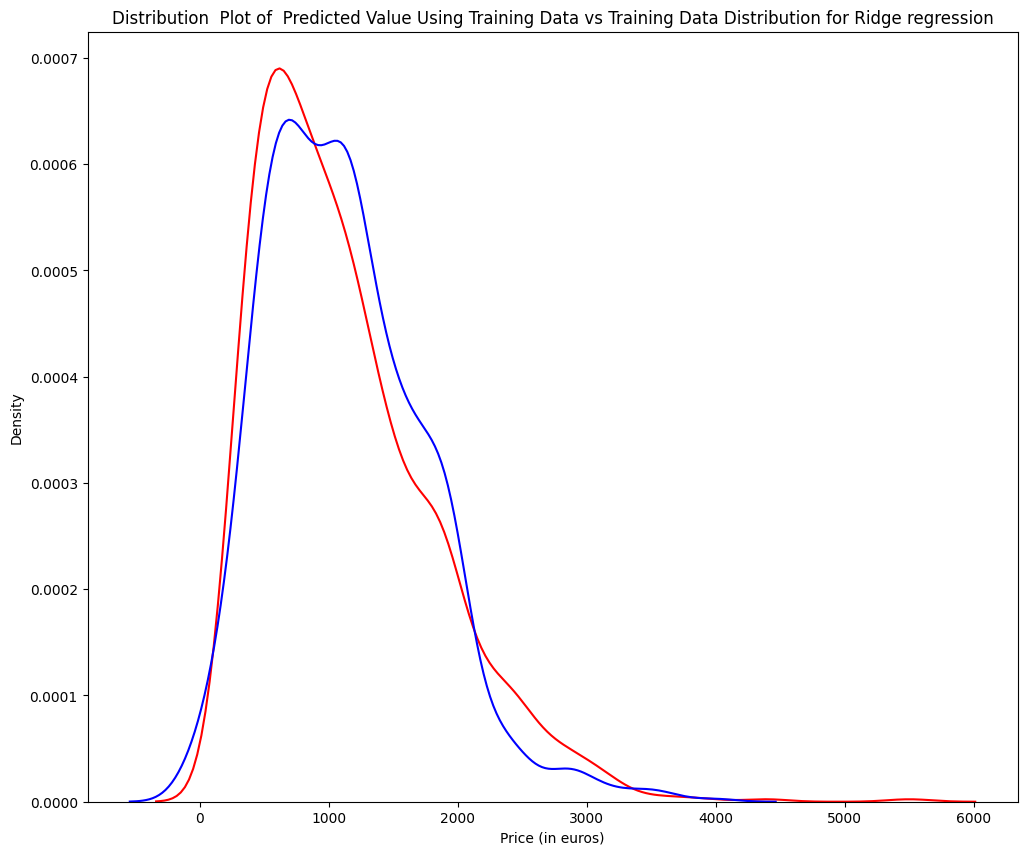

In [59]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution for Ridge regression'
DistributionPlot(y_train, rdg_train_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

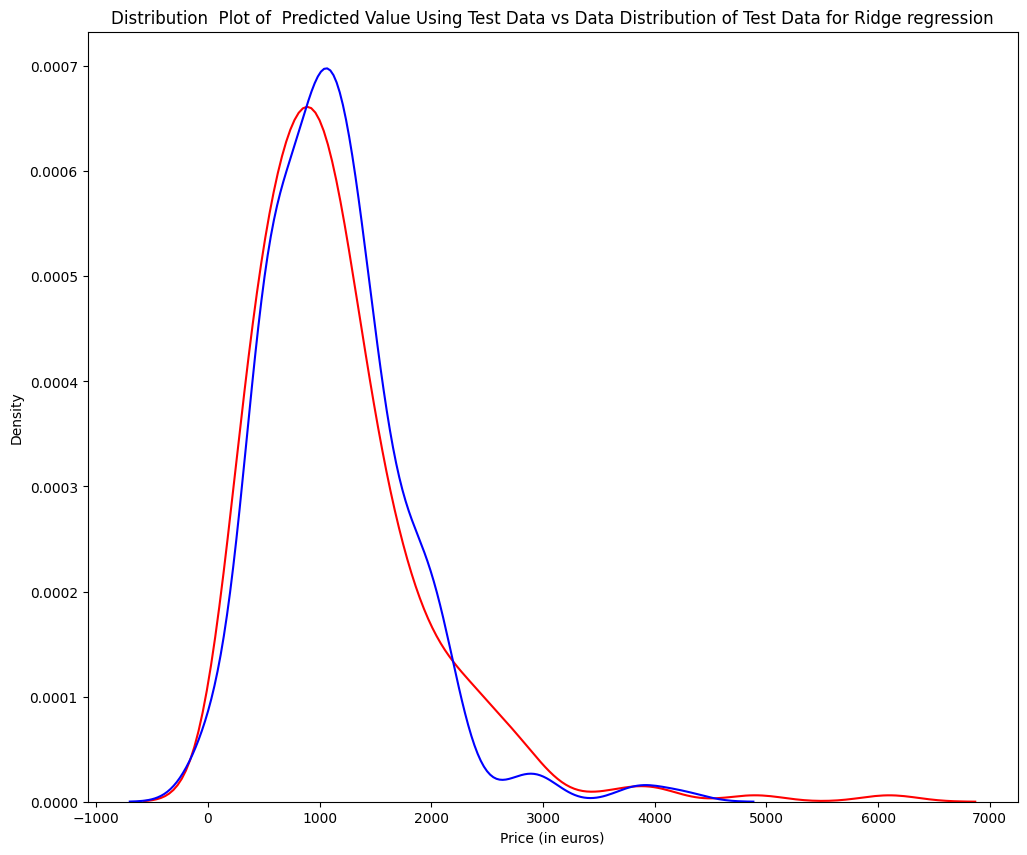

In [60]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data for Ridge regression'
DistributionPlot(y_test, rdg_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [61]:
print("MSE :",mean_squared_error(y_test, rdg_pred))
print("MAE: ",mean_absolute_error(y_test, rdg_pred))

MSE : 112176.34793508991
MAE:  209.48455270322435


GradientBoostingRegressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

gbr = GradientBoostingRegressor()

parameters1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbr_grid_search = GridSearchCV(gbr, parameters1, cv=5)

gbr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [63]:
gbr = gbr_grid_search.best_estimator_

gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [64]:
print('Train accuracy = ', gbr.score(X_train, y_train))
print('Test accuracy = ', gbr.score(X_test, y_test))

Train accuracy =  0.9751823167841553
Test accuracy =  0.9251207136164057


In [65]:
gbr_train_pred = gbr.predict(X_train)
print(gbr_train_pred[0:5])

[ 601.75683457  637.8331872  1370.53572255  813.45859508  969.44090417]


In [66]:
gbr_pred = gbr.predict(X_test)
print(gbr_pred[0:5])

[ 401.10586871  628.11789229 1065.28678891  762.87539792 1097.95781949]


In [67]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': gbr_pred})
print(results[0:5])

      Actual    Predicted
309   469.00   401.105869
622   776.00   628.117892
184  1199.00  1065.286789
705   795.00   762.875398
522  1279.73  1097.957819


<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

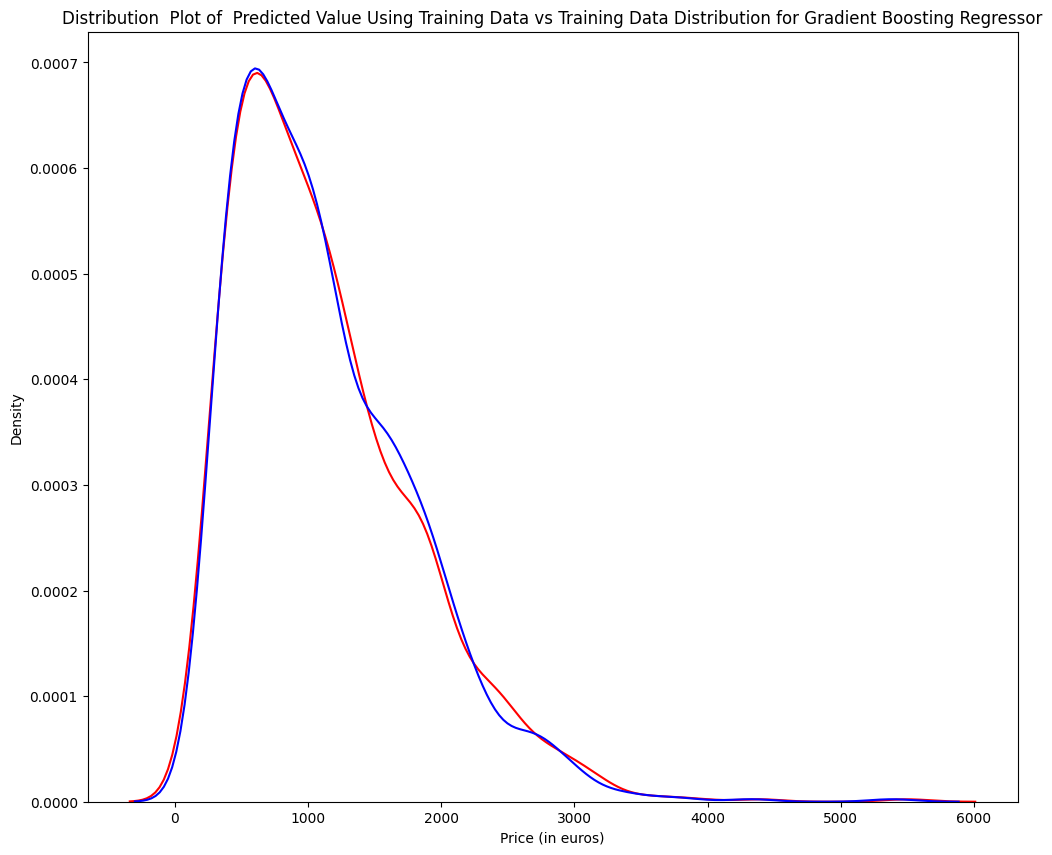

In [68]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution for Gradient Boosting Regressor'
DistributionPlot(y_train, gbr_train_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

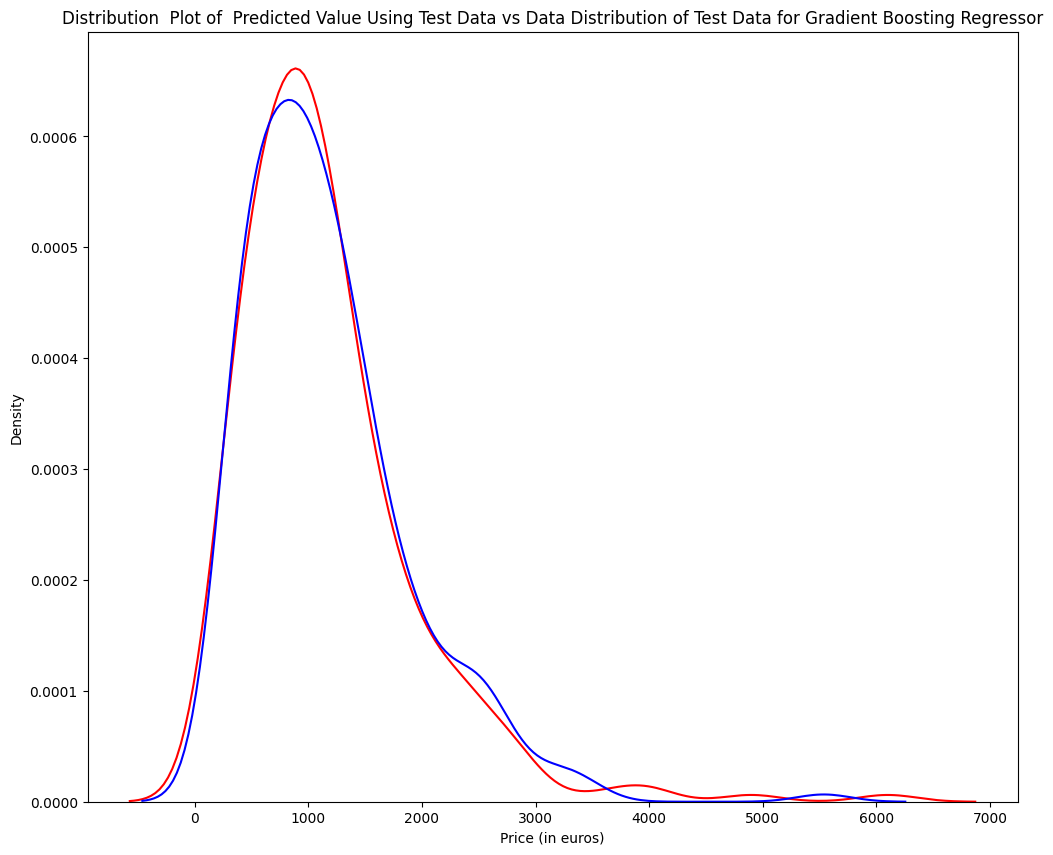

In [69]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data for Gradient Boosting Regressor'
DistributionPlot(y_test, gbr_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [70]:
print("MSE :",mean_squared_error(y_test, gbr_pred))
print("MAE: ",mean_absolute_error(y_test, gbr_pred))

MSE : 45109.69900802101
MAE:  115.24615639161591


Random Forest Regressor

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)

parameters2 = {
    'max_depth': [10,20,30],
    'max_features' : [5,10,20],
    'n_estimators': [10,50,100,150]
}

rf_grid_search = GridSearchCV(rf, param_grid=parameters2, cv=5)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [5, 10, 20],
                         'n_estimators': [10, 50, 100, 150]})

In [72]:
rf = rf_grid_search.best_estimator_
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=150,
                      random_state=0)

In [73]:
print('Train accuracy = ', rf.score(X_train, y_train))
print('Test accuracy = ', rf.score(X_test, y_test))

Train accuracy =  0.9777972046941231
Test accuracy =  0.9015771489519901


In [74]:
rf_train_pred = rf.predict(X_train)
rf_train_pred[0:5]

array([ 612.455924  ,  688.834313  , 1334.27835866,  823.59145387,
       1002.35671598])

In [75]:
rf_pred=rf.predict(X_test)
rf_pred[0:5]

array([ 447.07888353,  651.08284042, 1078.56396759,  787.83440694,
       1148.17888032])

In [76]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
results[0:5]

,Actual,Predicted
309,469.00,447.078884
622,776.00,651.082840
184,1199.00,1078.563968
705,795.00,787.834407
522,1279.73,1148.178880


<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

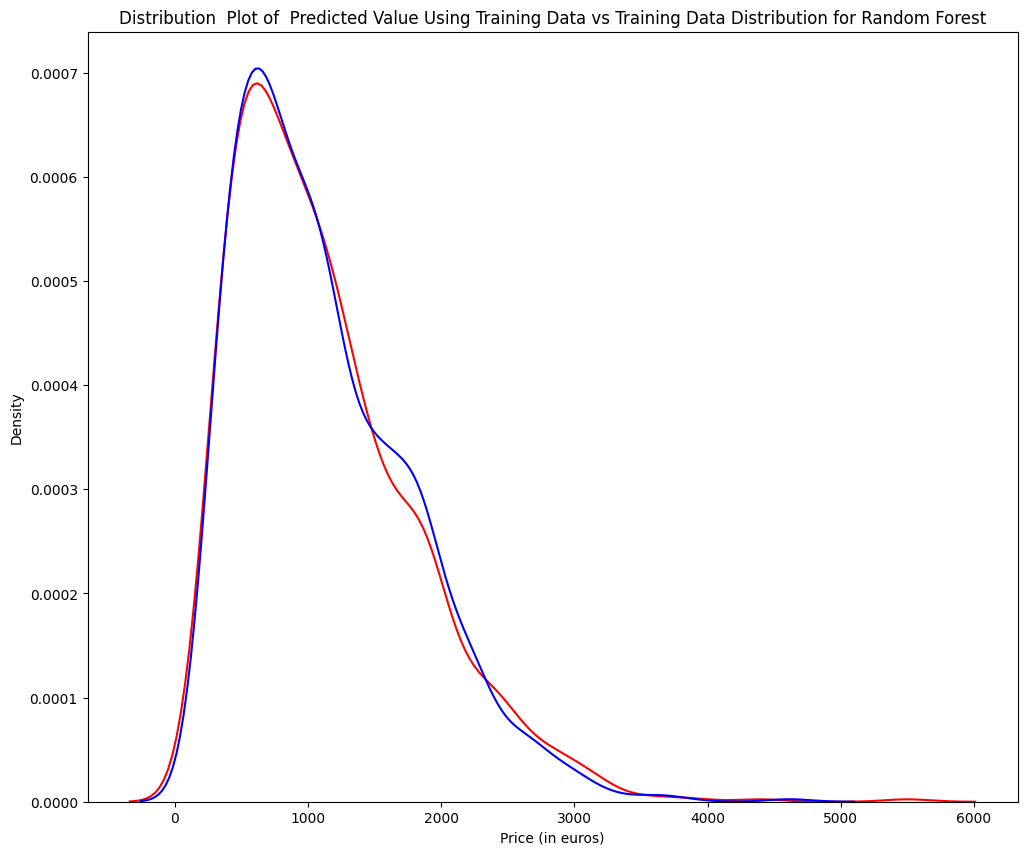

In [77]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution for Random Forest'
DistributionPlot(y_train, rf_train_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-45-05476931bd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-45-05476931bd8e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

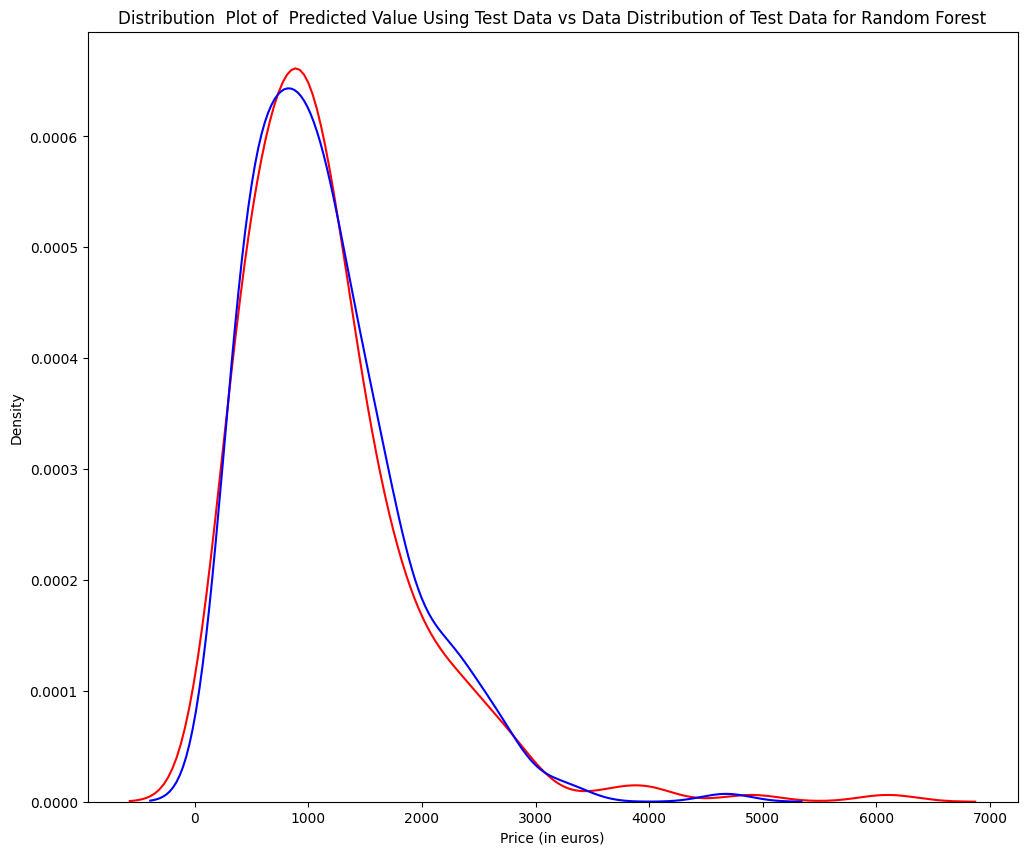

In [78]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data for Random Forest'
DistributionPlot(y_test, rf_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [79]:
print("MSE :",mean_squared_error(y_test, rf_pred))
print("MAE: ",mean_absolute_error(y_test, rf_pred))

MSE : 59293.10228121713
MAE:  115.50885649492464


Оцінимо результати

In [80]:
results = {
    ' Multiple Linear Regression': {
        'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
        'MAE': mean_absolute_error(y_test, pred),
        'R²': r2_score(y_test, pred)
    },
    'Ridge Regression': {
        'RMSE': np.sqrt(mean_squared_error(y_test, rdg_pred)),
        'MAE': mean_absolute_error(y_test, rdg_pred),
        'R²': r2_score(y_test, rdg_pred)
    },
    'Gradient Boosting Regressor': {
        'RMSE': np.sqrt(mean_squared_error(y_test, gbr_pred)),
        'MAE': mean_absolute_error(y_test, gbr_pred),
        'R²': r2_score(y_test, gbr_pred)
    },
    'Random Forest Regressor': {
        'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
        'MAE': mean_absolute_error(y_test, rf_pred),
        'R²': r2_score(y_test, rf_pred)
    }
}

results_df = pd.DataFrame(results).T
print(results_df)

                                   RMSE         MAE        R²
 Multiple Linear Regression  477.636780  329.837382  0.621307
Ridge Regression             334.927377  209.484553  0.813794
Gradient Boosting Regressor  212.390440  115.246156  0.925121
Random Forest Regressor      243.501750  115.508856  0.901577
